# Cross Validation and BootStrap

How do we test out that our predictions are going good. Technically we take new sample data from population and check our model. But, There isn't any New data so its smart to use data smartly to check our predictions.

### Prediction-error Estimates
1. Cp Statistic
2. AIC
3. BIC

### DrawBacks of Validation Set Approach
* The validation estimate of test error can be highly variable, depending on Precisely which observations are included in the training set and which observations are included in Cross-Validation set.
* In the validation approach, only a subset of the observations - those that are included in the training set rather than in the validation Set- are used to fit the model.
* Sometimes tend to overestimate.


### 5.3.1 The Validation Set Approach

In [1]:
# set.seed() function in order to set a seed for R’s random number generator
library(ISLR)
set.seed (123)
train=sample(392,196) #taking 196 out of 392 randomly calling it as train

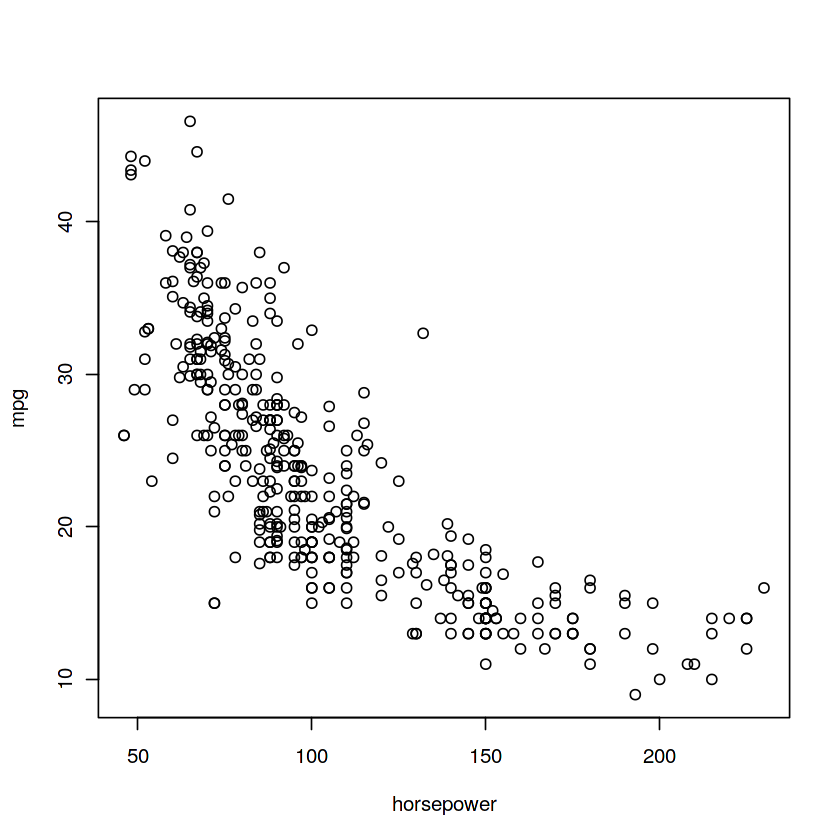

In [2]:
plot(mpg~horsepower,data=Auto)

In [3]:
lm.fit=lm(mpg~horsepower ,data=Auto,subset=train)
# predicting left from train
attach(Auto)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 21.24991

### Therefore, the estimated test MSE for the linear regression fit is 21.24. We can use the poly() function to estimate the test error for the quadratic and cubic regressions.

In [4]:
lm.fit2=lm(mpg~poly(horsepower ,2),data=Auto,subset=train) 
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 16.48112

In [5]:
lm.fit3=lm(mpg~poly(horsepower ,3),data=Auto,subset=train) 
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 16.58276

In [6]:
lm.fit3=lm(mpg~poly(horsepower ,4),data=Auto,subset=train) 
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 17.48078

### These error rates are 16.48,16.58 and 17.48, respectively. If we choose a different training set instead, then we will obtain somewhat different errors on the validation set.

In [7]:
set.seed (126)
train=sample(392,196)
lm.fit=lm(mpg~horsepower ,subset=train)
mean((mpg-predict(lm.fit,Auto))[-train]^2)

[1] 23.79112

In [8]:
lm.fit2=lm(mpg~poly(horsepower ,2),data=Auto,subset=train) 
mean((mpg-predict(lm.fit2,Auto))[-train]^2)

[1] 18.45774

In [9]:
lm.fit3=lm(mpg~poly(horsepower ,3),data=Auto,subset=train)
mean((mpg-predict(lm.fit3,Auto))[-train]^2)

[1] 18.64853

### Using this split of the observations into a training set and a validation set, we find that the validation set error rates for the models with linear, quadratic, and cubic terms are 23.79, 18.45, and 18.64, respectively.

### These results are consistent with our previous findings: a model that predicts mpg using a quadratic function of horsepower performs better than a model that involves only a linear function of horsepower, and there is little evidence in favor of a model that uses a cubic function of horsepower.

### 5.3.2 Leave-One-Out Cross-Validation

#### The LOOCV estimate can be automatically computed for any generalized linear model using the glm() and cv.glm() functions. glm() function to perform logistic regression by passing in the family="binomial" argument. But if we use glm() to fit a model without passing in the family argument, then it performs linear regression, just like the lm() function.

In [10]:
glm.fit=glm(mpg~horsepower ,data=Auto)
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [11]:
lm.fit=lm(mpg~horsepower ,data=Auto)
coef(lm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

### Glm can also work as Lm until family="binomial" argument is passed. Both are having same coef.
### we will perform linear regression using the glm() function rather than the lm() function because the former can be used together with cv.glm(). The cv.glm() function is part of the boot library.

In [12]:
library(boot)
glm.fit=glm(mpg~horsepower ,data=Auto)
cv.err=cv.glm(Auto,glm.fit)
cv.err$delta

[1] 24.23151 24.23114

#### The cv.glm() function produces a list with several components. The two numbers in the delta vector contain the cross-validation results. So the first is raw result and second is the biased corrected version of result. 

#### Now instead of passing polynomial every time we will use for loop and get results with different degree of ploynomials.

In [13]:
cv.error=rep(0,5)
for (i in 1:5){glm.fit=glm(mpg~poly(horsepower ,i),data=Auto)
cv.error[i]=cv.glm(Auto,glm.fit)$delta[1] }
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

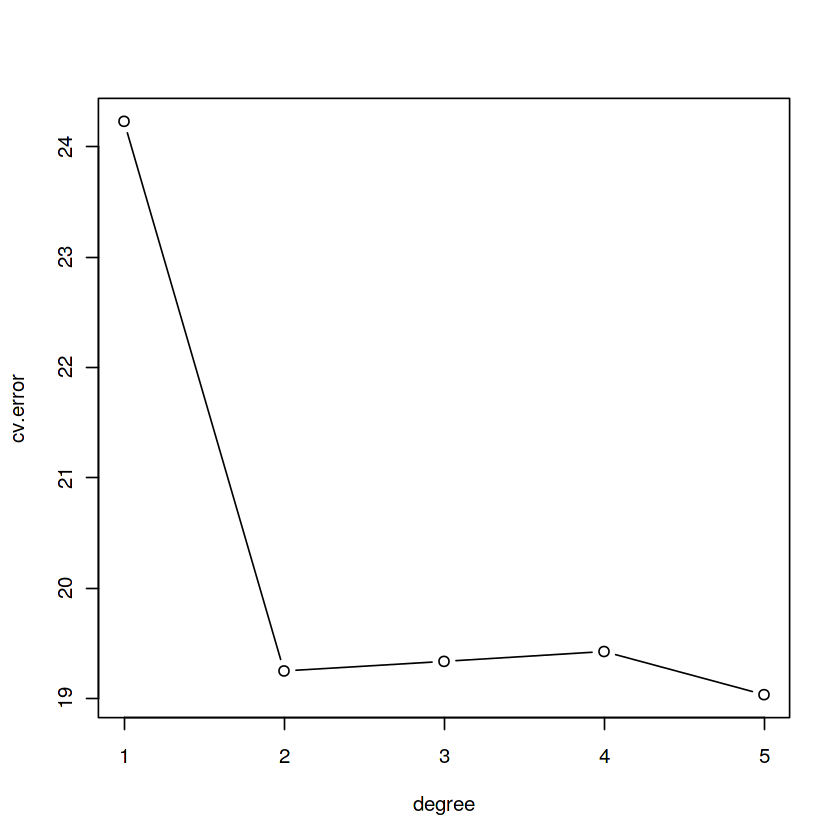

In [14]:
degree = 1:5
cv.error=rep(0,5)
for (i in 1:5){glm.fit=glm(mpg~poly(horsepower ,i),data=Auto)
cv.error[i]=cv.glm(Auto,glm.fit)$delta[1] }
plot(degree,cv.error,type="b")
cv.error

# Alternate Approach according to formula in lectures
# 5.3.2 Leave-One-Out Cross-Validation

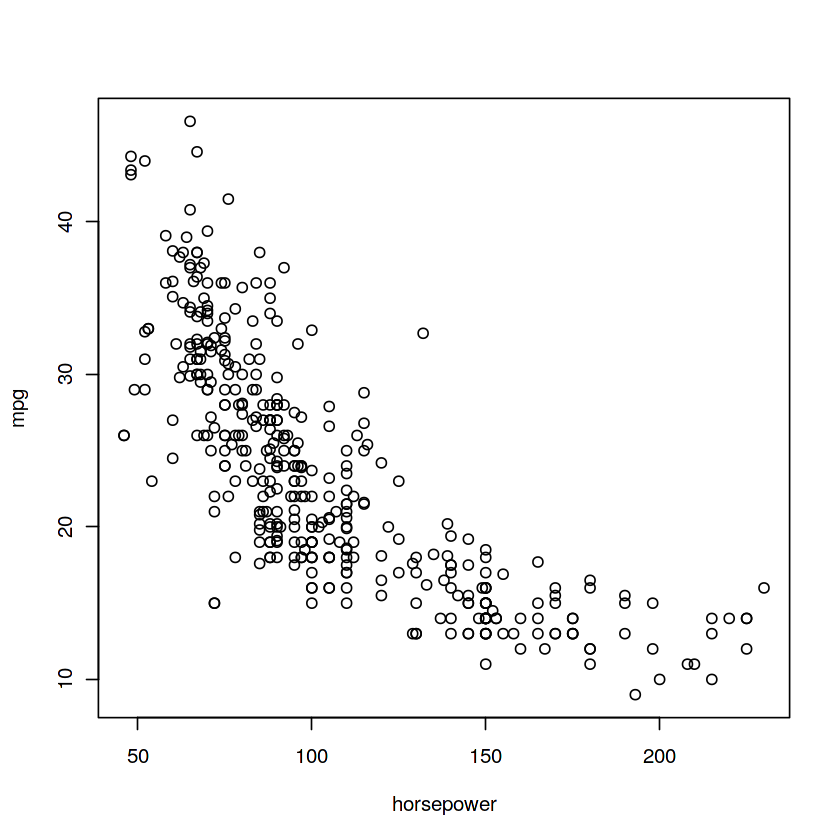

In [15]:
require(ISLR)
require(boot)
plot(mpg~horsepower,data=Auto)


In [16]:
## LOOCV
glm.fit=glm(mpg~horsepower,data=Auto)
cv.glm(Auto,glm.fit)$delta

[1] 24.23151 24.23114

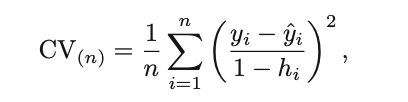

In [17]:
# Writing our own fn
loocv=function(fit){
    h = lm.influence(fit)$h  #lm.influence is post processor for lm.fit and will extract element h from them which gives diagobal element hii
    mean((residuals(fit)/(1-h))^2)
}

In [18]:
# now we try it out
loocv(glm.fit)
cvv.error=rep(0,5)

[1] 24.23151

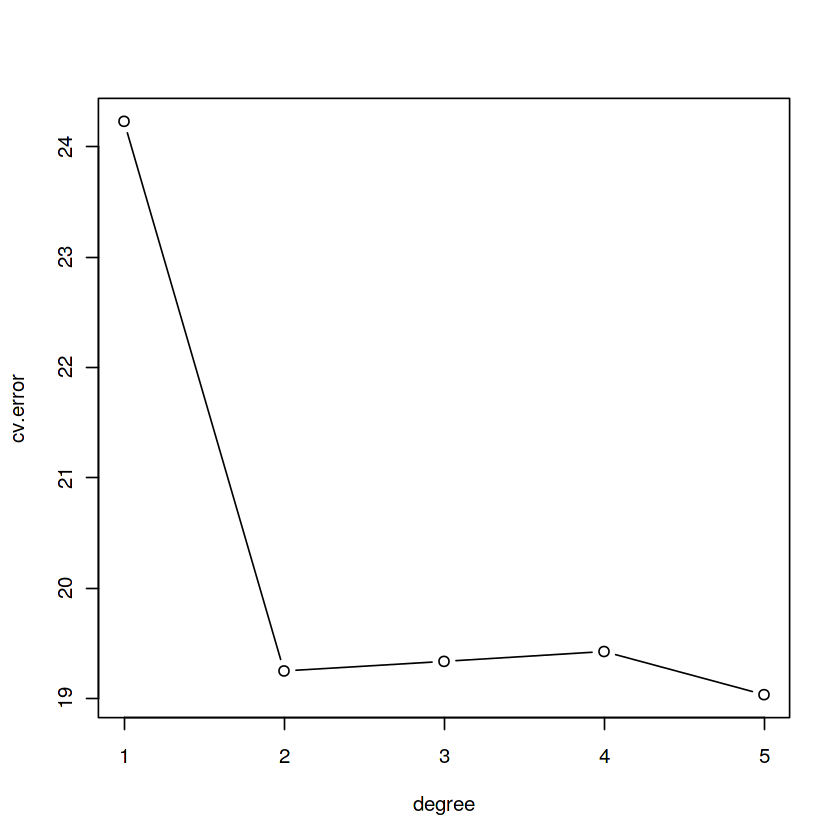

In [19]:
# polynomials with different degree
degree = 1:5
for(d in degree){
    glm.fit=glm(mpg~poly(horsepower,d),data=Auto)
    cv.error[d]=loocv(glm.fit)
}

plot(degree,cv.error,type="b")

# 10 fold-CV

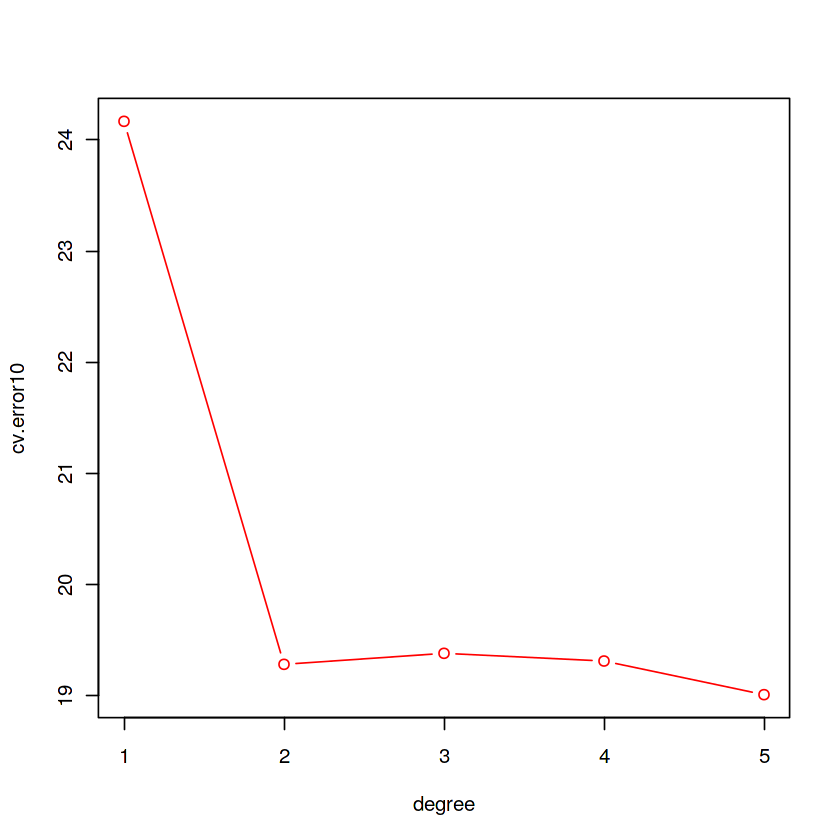

In [20]:
cv.error10 = rep(0,5)
for(d in degree){
    glm.fit=glm(mpg~poly(horsepower,d),data=Auto)
    cv.error10[d]=cv.glm(Auto,glm.fit,K=10)$delta[1]
}

plot(degree,cv.error10,type="b",col="red")

## Combining LOOCV & 10-K fold for comparison

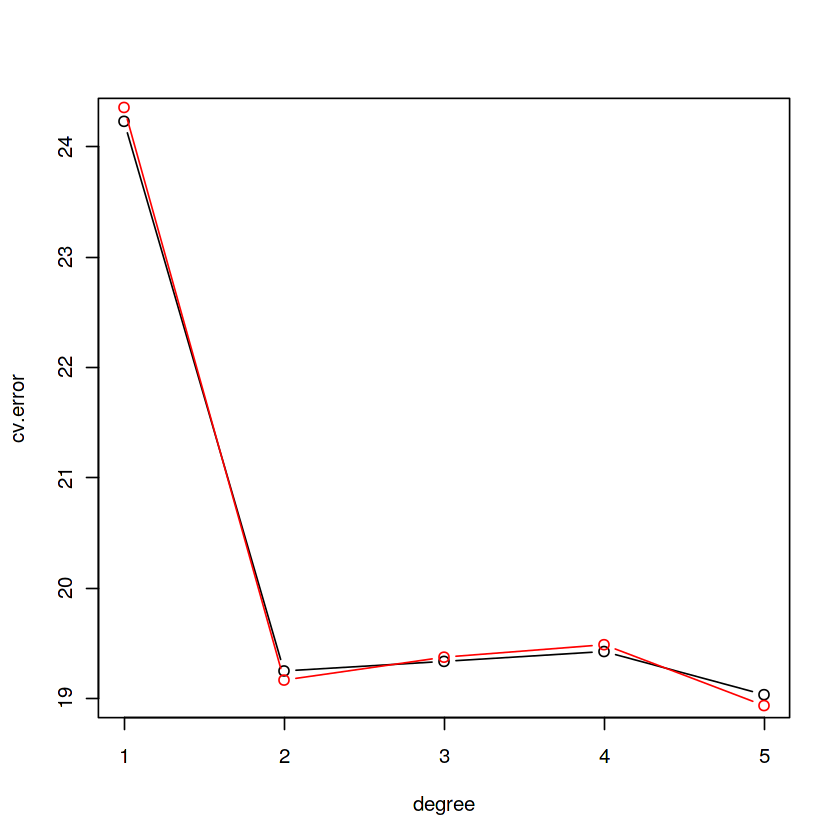

In [21]:
degree = 1:5
for(d in degree){
    glm.fit=glm(mpg~poly(horsepower,d),data=Auto)
    cv.error[d]=loocv(glm.fit)
}


cv.error10 = rep(0,5)
for(d in degree){
    glm.fit=glm(mpg~poly(horsepower,d),data=Auto)
    cv.error10[d]=cv.glm(Auto,glm.fit,K=10)$delta[1]
}
plot(degree,cv.error,type="b")
lines(degree,cv.error10,type="b",col="red") # red line is for 10-K folds

# Bootstrap

### Performing a bootstrap analysis in R entails only two steps. First, we must create a function that computes the statistic of interest. Second, we use the boot() function, which is part of the boot library, to perform the bootstrap by repeatedly sampling observations from the data set with replacement.

### To illustrate the use of the bootstrap on this data, we must first create a function, alpha.fn(), which takes as input the (X,Y) data as well as a vector indicating which observations should be used to estimate α. The function then outputs the estimate for α based on the selected observations.

In [22]:
library(ISLR)
alpha.fn=function(data,index){
X=data$X[index]
Y=data$Y[index]
return((var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))}

In [23]:
alpha.fn(Portfolio ,1:100)

[1] 0.5758321

### The next command uses the sample() function to randomly select 100 ob- servations from the range 1 to 100, with replacement. This is equivalent to constructing a new bootstrap data set and recomputing αˆ based on the new data set.

In [24]:
set.seed (1)
alpha.fn(Portfolio,sample(100,100,replace=T))

[1] 0.7368375

### We can implement a bootstrap analysis by performing this command many times, recording all of the corresponding estimates for α, and computing the resulting standard deviation. However, the boot() function automates this approach. Below we produce R = 1, 000 bootstrap estimates for α.

In [25]:
library(boot)
boot.out=boot(Portfolio ,alpha.fn,R=1000)
boot.out


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.5758321 -0.001695873  0.09366347

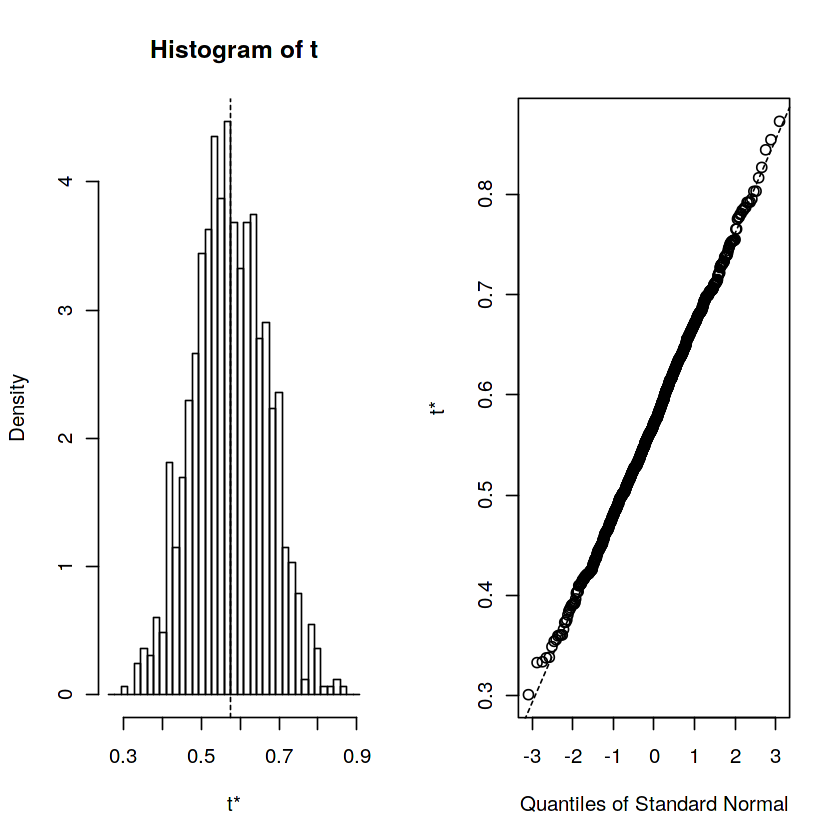

In [26]:
plot(boot.out)

### The final output shows that using the original data, αˆ = 0.5758, and that the bootstrap estimate for SE(αˆ) is 0.0926.

In [27]:
# confidence intervals for the statistics
boot.ci(boot.out)

Warning message in boot.ci(boot.out):
“bootstrap variances needed for studentized intervals”


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot.out)

Intervals : 
Level      Normal              Basic         
95%   ( 0.3940,  0.7611 )   ( 0.3977,  0.7598 )  

Level     Percentile            BCa          
95%   ( 0.3919,  0.7539 )   ( 0.4039,  0.7723 )  
Calculations and Intervals on Original Scale

# Estimating the Accuracy of a Linear Regression Model

### The bootstrap approach can be used to assess the variability of the coef- ficient estimates and predictions from a statistical learning method. Here we use the bootstrap approach in order to assess the variability of the estimates for β0 and β1, the intercept and slope terms for the linear regres- sion model that uses horsepower to predict mpg in the Auto data set.

### We will compare the estimates obtained using the bootstrap to those obtained using the formulas for SE(βˆ0) and SE(βˆ1) 

### We first create a simple function, boot.fn(), which takes in the Auto data set as well as a set of indices for the observations, and returns the intercept and slope estimates for the linear regression model. We then apply this function to the full set of 392 observations in order to compute the esti- mates of β0 and β1 on the entire data set using the usual linear regression coefficient estimate formulas.

### Note that we do not need the { and } at the beginning and end of the function because it is only one line long.

In [28]:
boot.fn=function(data,index)
return(coef(lm(mpg~horsepower ,data=data,subset=index))) 

boot.fn(Auto ,1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

### The boot.fn() function can also be used in order to create bootstrap esti- mates for the intercept and slope terms by randomly sampling from among the observations with replacement. 

In [29]:
set.seed (1)
boot.fn(Auto,sample(392,392,replace=T))
boot.fn(Auto,sample(392,392,replace=T))

(Intercept)  horsepower 
 40.3404517  -0.1634868

(Intercept)  horsepower 
 40.1186906  -0.1577063

In [30]:
boot(Auto ,boot.fn ,1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0544513229 0.841289790
t2* -0.1578447 -0.0006170901 0.007343073

### This indicates that the bootstrap estimate for SE(βˆ0) is 0.86, and that the bootstrap estimate for SE(βˆ1) is 0.0074. As discussed in Section 3.1.2,standard formulas can be used to compute the standard errors for the regression coefficients in a linear model. These can be obtained using the summary() function.

In [31]:
summary(lm(mpg~horsepower ,data=Auto))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),39.9358610,0.717498656,55.65984,1.220362e-187
horsepower,-0.1578447,0.006445501,-24.48914,7.031989e-81


In [34]:
# fitting the model for second degree
boot.fn=function(data,index)
+ coefficients(lm(mpg~horsepower+I(horsepower^2),data=data,
subset=index))
set.seed (1)
boot.out=boot(Auto ,boot.fn ,1000)
boot.out


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original        bias     std. error
t1* 56.900099702  3.511640e-02 2.0300222526
t2* -0.466189630 -7.080834e-04 0.0324241984
t3*  0.001230536  2.840324e-06 0.0001172164

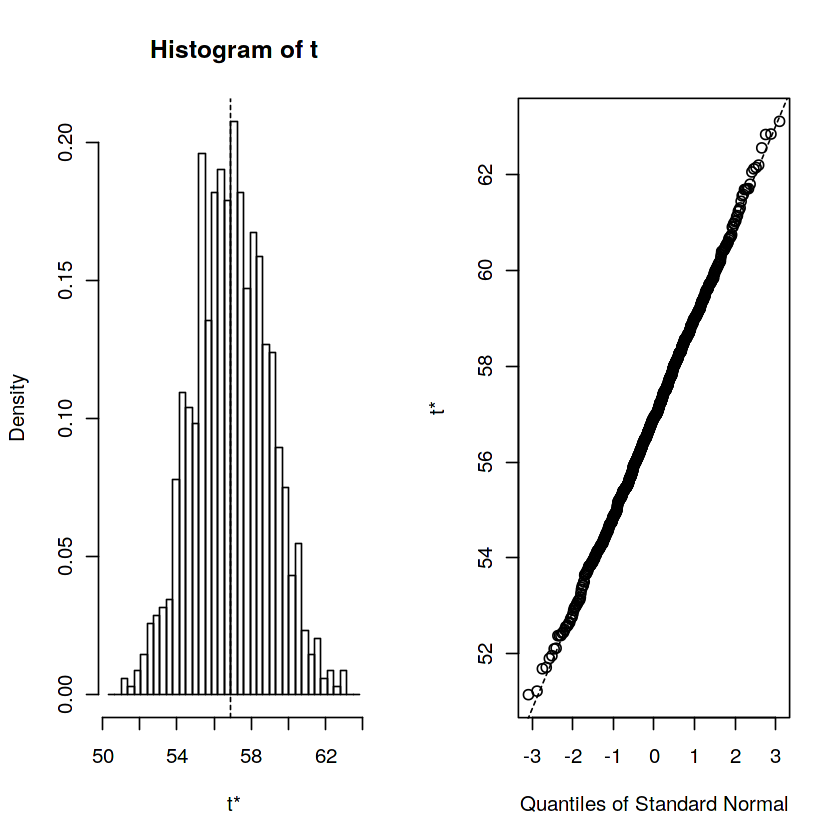

In [35]:
plot(boot.out)